# Name: D.SAITEJA
# Roll no: 197123

## Question: 1

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 4615 bytes


In [5]:
#reading the dataset
dataset = pd.read_csv("iris.csv")

#printing first few rows of the dataset
print(dataset.head())

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [10]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print("shape of x is", x.shape)
print("shape of y is", y.shape)

shape of x is (150, 4)
shape of y is (150,)


In [14]:
#implementing LCA i.e., all the steps mentioned

def LCA_(x, y, n):
  #number of samples and number of features in the dataset
  n_samples, n_features = x.shape

  #number of labels names of the labels in the dataset
  class_labels = np.unique(y)
  n_labels = len(class_labels)

  #overall mean of the dataset by feature
  mean_features = np.mean(x, axis = 0)

  #scatter matrices initialisation
  SW = np.zeros((n_features, n_features))
  SB = np.zeros((n_features, n_features))

  #updating scatter matrices SW and SB
  for c in class_labels:
    x_c = x[y == c]
    mean_c = np.mean(x_c, axis = 0)

    SW += np.dot((x_c - mean_c).T, (x_c - mean_c))

    n_c = x.shape[0]
    mean_diff = (mean_c - mean_features).reshape(n_features, 1)
    SB += n_c * (mean_diff).dot(mean_diff.T)

  A = np.linalg.inv(SW).dot(SB)

  #calculating eigen values and eigen vectors
  eigenvalues, eigenvectors = np.linalg.eig(A)

  eigenvectors = eigenvectors.T
  indices = np.argsort(abs(eigenvalues))[::-1]

  #sorting them using the indices found in the above step
  eigenvalues = eigenvalues[indices]
  eigenvectors = eigenvectors[indices]

  #selecting the first n features which ever necessary
  return eigenvectors[0:n]

def transform(x, linear_discriminants):
  return np.dot(x, linear_discriminants.T)

In [11]:
n = 2
linear_discriminants = LCA_(x, y, n)

In [12]:
#modifying the data using the linear discriminants
x_modified = transform(x, linear_discriminants)
print("modified shape of x is", x_modified.shape)

modified shape of x is (150, 2)


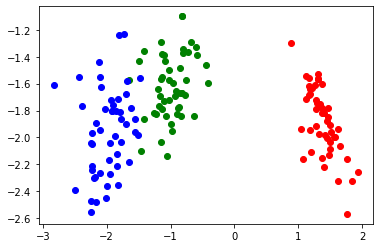

In [13]:
#plotting the modified data

colors = ['r','g','b']
labels = np.unique(y)
for color, label in zip(colors, labels):
  class_data = x_modified[np.flatnonzero(y==label)]
  plt.scatter(class_data[:,0],class_data[:,1],c=color)
plt.show()

## Q: 2

In [15]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics

In [16]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Wine.csv to Wine.csv
User uploaded file "Wine.csv" with length 11462 bytes


In [18]:
#reading the imported dataset
df = pd.read_csv("Wine.csv")

#printing first few rows of the dataset
print(df.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

In [24]:
#getting X and Y variables (independent and dependent variables) from the dataset

X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

print("Shape of X is", X.shape)
print("Shape of Y is", Y.shape)

Shape of X is (178, 13)
Shape of Y is (178,)


In [27]:
#getting training and testing datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 13)

print("shape of X_train is", X_train.shape)
print("shape of Y_train is", Y_train.shape)

shape of X_train is (142, 13)
shape of Y_train is (142,)


In [ ]:
#scaling the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
#performing the LDA on the given dataset
lda_model = LDA(n_components = 2)
lda_model.fit(X_train, Y_train)

print(lda_model.explained_variance_ratio_)

X_train = lda_model.transform(X_train)
X_test = lda_model.transform(X_test)

print("shape of the X_train is:", X_train.shape)

[0.66670657 0.33329343]
shape of the X_train is: (142, 2)


In [35]:
#performing logistic regression on the transformed dataset
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

Y_pred = lr_model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(Y_pred, Y_test) * 100)

Accuracy: 97.22222222222221
